In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Libraries Imported Successfully')

Libraries Imported Successfully


In [3]:
# Reading John Hopkins Covid-19 Dataset 
covdata = pd.read_csv('C:/Arunava/pyLib/py_practice_v3/Datasets/covid19_Confirmed_dataset.csv')
# Reading World Happiness Dataset
hapdata = pd.read_csv('C:/Arunava/pyLib/py_practice_v3/Datasets/worldwide_happiness_report.csv')
print('Cov Data Imported Success')
print(covdata.head())
print('Hap Data Imported Success')
print(hapdata.head())

Cov Data Imported Success
  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/2

In [4]:
print(covdata.shape)
print(hapdata.shape)

(266, 104)
(156, 9)


In [10]:
# Removing unnecessary columns Long and lat 
covdata = covdata.drop(["Lat","Long"], axis=1)

KeyError: "['Lat' 'Long'] not found in axis"

In [12]:
print(covdata.shape)
print(covdata.head())

(266, 102)
  Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463 

In [14]:
# Grouping by Country names instead of integer indexes
covdata_by_country = covdata.groupby("Country/Region").sum()
covdata_by_country.head()

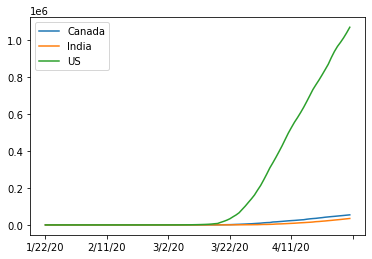

In [19]:
# Plotting and comparing multiple countries 
covdata_by_country.loc["Canada"].plot()
covdata_by_country.loc["India"].plot()
covdata_by_country.loc["US"].plot()
plt.legend()

In [22]:
# Finding maximum infection rate of each countries
countries = list(covdata_by_country.index)
max_infect_rate = []
for c in countries:
    max_infect_rate.append(covdata_by_country.loc[c].diff().max())

In [24]:
# Adding the max infection rate column to the dataset
max_infect_rate
covdata_by_country["max_infect_rate"] = max_infect_rate
covdata_by_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [26]:
# Creating a data frame with only 2 columns
max_infection_data = pd.DataFrame(covdata_by_country["max_infect_rate"])
max_infection_data

,max_infect_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [33]:
# Cleaning World Happiness Data
hapdata.head()
#Dropping some useless columns
hapdata = hapdata.drop(["Overall rank", "Generosity", "Perceptions of corruption"], axis = 1)

KeyError: "['Overall rank' 'Generosity' 'Perceptions of corruption'] not found in axis"

In [38]:
# Changing the Indices of the data to the country name
hapdata_by_country = hapdata.groupby("Country or region").sum()
hapdata_by_country

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Afghanistan,3.203,0.350,0.517,0.361,0.000
Albania,4.719,0.947,0.848,0.874,0.383
Algeria,5.211,1.002,1.160,0.785,0.086
Argentina,6.086,1.092,1.432,0.881,0.471
Armenia,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,4.707,0.960,1.427,0.805,0.154
Vietnam,5.175,0.741,1.346,0.851,0.543
Yemen,3.380,0.287,1.163,0.463,0.143


In [43]:
join_data = covdata_by_country.join(hapdata_by_country, how = "inner")
join_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1703,1828,1939,2171,232.0,3.203,0.350,0.517,0.361,0.000
Albania,0,0,0,0,0,0,0,0,0,0,...,736,750,766,773,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,0,0,0,0,0,0,0,0,0,0,...,3517,3649,3848,4006,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,0,0,0,0,0,0,0,0,0,0,...,4003,4127,4285,4428,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,0,0,0,0,0,0,0,0,0,0,...,1808,1867,1932,2066,134.0,4.559,0.850,1.055,0.815,0.283


In [45]:
join_data.corr()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
1/22/20,1.000000,0.999993,0.999987,0.999989,0.999991,0.999992,0.999994,0.999993,0.999993,0.999994,...,0.161942,0.158568,0.155693,0.152280,0.378970,-0.015667,0.029126,-0.020739,0.060671,0.073559
1/23/20,0.999993,1.000000,0.999995,0.999992,0.999992,0.999990,0.999991,0.999989,0.999988,0.999989,...,0.161822,0.158449,0.155574,0.152160,0.378879,-0.015595,0.029235,-0.020479,0.061013,0.074052
1/24/20,0.999987,0.999995,1.000000,0.999996,0.999993,0.999990,0.999990,0.999988,0.999986,0.999987,...,0.162602,0.159232,0.156334,0.152910,0.380417,-0.015275,0.029645,-0.020245,0.061385,0.074229
1/25/20,0.999989,0.999992,0.999996,1.000000,0.999997,0.999995,0.999993,0.999993,0.999991,0.999991,...,0.162559,0.159189,0.156291,0.152867,0.380342,-0.015422,0.029502,-0.020443,0.061126,0.074153
1/26/20,0.999991,0.999992,0.999993,0.999997,1.000000,0.999999,0.999997,0.999997,0.999996,0.999996,...,0.162379,0.159009,0.156118,0.152698,0.379908,-0.015182,0.029683,-0.020337,0.061289,0.074201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Score,-0.015667,-0.015595,-0.015275,-0.015422,-0.015182,-0.015334,-0.015437,-0.015353,-0.015427,-0.015364,...,0.283297,0.283836,0.284572,0.285735,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.029126,0.029235,0.029645,0.029502,0.029683,0.029502,0.029333,0.029435,0.029380,0.029448,...,0.326739,0.327270,0.328152,0.329048,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,-0.020739,-0.020479,-0.020245,-0.020443,-0.020337,-0.020488,-0.020624,-0.020615,-0.020676,-0.020602,...,0.238030,0.238917,0.240064,0.241549,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.060671,0.061013,0.061385,0.061126,0.061289,0.061072,0.060847,0.060867,0.060820,0.060896,...,0.344061,0.343238,0.342563,0.341900,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892


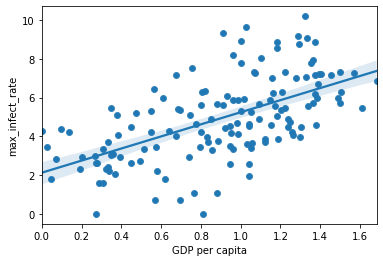

In [49]:
x = join_data["GDP per capita"]
y = join_data["max_infect_rate"]
sns.scatterplot(x, np.log(y))
sns.regplot(x, np.log(y))